## Basic morphological measures of nearby spiral galaxies based on Frei catalog

In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from astropy.io import fits
import glob

In [2]:
from photutils import DAOStarFinder, aperture_photometry
from photutils import centroid_com, centroid_1dg, centroid_2dg
from photutils import make_source_mask, Background2D, MedianBackground
from photutils import CircularAperture, CircularAnnulus
from astropy.table import hstack, vstack, Column
from astropy.stats import SigmaClip, biweight_location, mad_std, sigma_clipped_stats

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `photutils.centroid_com` is a deprecated alias for `photutils.centroids.centroid_com`. Instead, please use `from photutils.centroids import centroid_com` to silence this warning.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `photutils.centroid_1dg` is a deprecated alias for `photutils.centroids.centroid_1dg`. Instead, please use `from photutils.centroids import centroid_1dg` to silence this warning.
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `photutils.centroid_2dg` is a deprecated alias for `photutils.centroids.centroid_2dg`. Instead, please use `from photutils.centroids import centroid_2dg` to silence this warning.
  


In [3]:
import scipy
import matplotlib.pyplot as plt
from matplotlib import transforms
import scipy.ndimage as ndi
from astropy.visualization import simple_norm
from astropy.modeling import models
from astropy.convolution import convolve
import photutils
import time
import statmorph
#%matplotlib inline

### Original image

13-JAN-2002


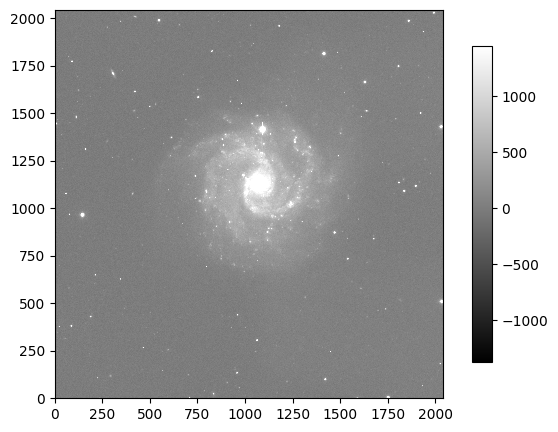

In [4]:
from astropy.nddata import Cutout2D
from astropy import units as u

#FitsName = 'frame-u-003818-5-0020.fits'
FitsName = './n3184r600r.fits'
hdulist = fits.open(FitsName)
hdulist.close()
#print (hdulist[0].header['FILENAME'])
print (hdulist[0].header['DATE-OBS'])
Image = fits.getdata(FitsName)
#position = (1760, 600)
#size = (101, 101)     # pixels
#size = u.Quantity((101, 101), u.pixel)
size = (41*u.pixel, 51*u.pixel)
#Image = Cutout2D(data, position, size)
#Image = Image[100:1000, 1300:2150]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(Image, cmap='gray', origin='lower',\
                  vmin=np.median(Image)-3.0*np.std(Image),\
                  vmax=np.median(Image)+3.0*np.std(Image))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()
#================================================================================
#print(np.median(Image))
#print(len(Image))
#print((Image.size))
#print(float(Image.size/len(Image)))
#print(type(Image))
#print((Image))
#print(Image[0,1])


In [5]:
print (hdulist[0].header)

SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 2042 / Axis length                                    NAXIS2  =                 2043 / Axis length                                    EXTEND  =                    F / File may contain extensions                    IRAF-TLM= '14:41:26 (30/03/2005)' / Time of last modification                   OBJECT  = 'NGC3184 R'          /                                                ORIGIN  = 'KPNO-IRAF'           /                                               DATE    = '2005-03-30T19:41:18'                                                 IRAF-MAX=           0.000000E0  /  DATA MAX                                     IRAF-MIN=           0.000000E0  /  DATA MIN                                     ORIGIN  = 'KPNO-IRAF'           /       

## Down Sampling

In [6]:
import FITS_tools
DownSample_aux = FITS_tools.downsample.downsample_axis(Image, 16, 0, truncate=False)
#print(DownSample_aux)
#FITS_tools.downsample.downsample_header(hdulist[0].header, 4, 2)
#FITS_tools.cube_regrid.downsample_cube(hdulist[0], 4, spectralaxis=None)
outfile = 'DownSample_aux.fits'
hdu = fits.PrimaryHDU(DownSample_aux)
hdu.writeto(outfile, overwrite=True)

FitsNameDownSample = 'DownSample_aux.fits'
hdulist = fits.open(FitsNameDownSample)
hdulist.close()
#print (hdulist[0].header['FILENAME'])

DownSample_aux_hdu = fits.getdata(FitsNameDownSample)

/usr/local/lib/python3.7/site-packages/FITS_tools/downsample.py:57: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stacked_array = np.concatenate([[crarr[makeslice(ii)]] for ii in range(factor)])


In [7]:
DownSample = FITS_tools.downsample.downsample_axis(DownSample_aux_hdu, 16, 1, truncate=False)
#print(DownSample)

In [8]:
outfile = 'DownSample.fits'
hdu = fits.PrimaryHDU(DownSample)
hdu.writeto(outfile, overwrite=True)

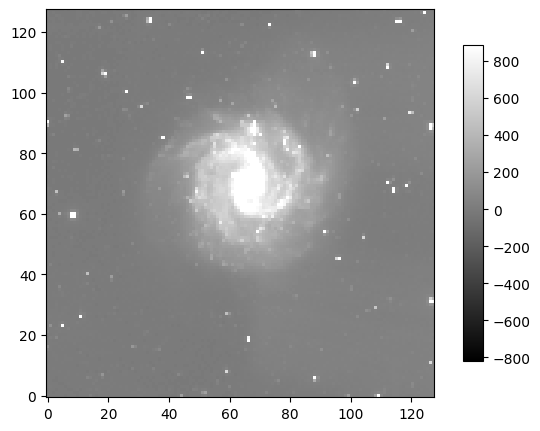

In [9]:
FitsName = 'DownSample.fits'
hdulist = fits.open(FitsName)
hdulist.close()
#print (hdulist[0].header['FILENAME'])
#print (hdulist[0].header['DATE-OBS'])
ImageDownSample = fits.getdata(FitsName)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(ImageDownSample, cmap='gray', origin='lower',\
                  vmin=np.median(ImageDownSample)-3.0*np.std(ImageDownSample),\
                  vmax=np.median(ImageDownSample)+3.0*np.std(ImageDownSample))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()
#==================================================================================
#print(np.median(ImageDownSample))
#print(len(ImageDownSample))
#print((ImageDownSample.size))
#print(float(ImageDownSample.size/len(ImageDownSample)))
#print(type(Image))
#print((Image))
#print(Image[0,1])

## Find sources on the original image

In [10]:
radius = 55.
dr = 35.
r_in = radius
r_out = r_in + dr
aperture_area = np.pi*radius**2.
annulus_area = np.pi*r_out**2. - aperture_area

In [12]:
Mask = make_source_mask(Image, nsigma=2, npixels=5, dilate_size=11)

In [11]:
Mask = make_source_mask(Image, nsigma=2, npixels=5, dilate_size=11)
Mean, Median, STD = sigma_clipped_stats(Image, sigma=3.0, mask=Mask)
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(Image, (32, 32), filter_size=(4, 4),\
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
find_stars = DAOStarFinder(fwhm=15, threshold=43300.5)
sources = find_stars((Image-bkg.background) - Median)

#print(sources["flux"])
#print(max(sources["flux"]))
#print(max(sources["peak"]))
cent = max(sources["flux"])
pk = max(sources["peak"])

    #positions = ((sources['xcentroid'][0], sources['ycentroid'][0]),(sources['xcentroid'][1], sources['ycentroid'][1])) 
positions = ()
for i in np.arange(len(sources)):
    positions = positions + ((sources['xcentroid'][i], sources['ycentroid'][i]),)
    #if sources["flux"][i] == cent:
        #print("center:")
        #print(i,(sources['xcentroid'][i], sources['ycentroid'][i]))
    #if sources["peak"][i] == pk:
        #print("center:")
        #print(i,(sources['xcentroid'][i], sources['ycentroid'][i]))
    print (sources)
    #print (positions)
    #print positions1
    
aperture = CircularAperture(positions, radius)
annulus = CircularAnnulus(positions, r_in, r_out)
flux = []
flux = aperture_photometry(Image,aperture,method='subpixel', subpixels=32)
backg = aperture_photometry(Image,annulus,method='subpixel', subpixels=32)

    #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75)) 
    #im1 = axes.imshow(SumImage_D1, cmap='gray', origin='lower',\
    #              vmin=np.median(SumImage_D1)-3.0*np.std(SumImage_D1),\
    #              vmax=np.median(SumImage_D1)+3.0*np.std(SumImage_D1))
    #aperture.plot(color='blue', lw=1.5, alpha=0.5)
    #annulus.plot(color='blue', lw=.5, alpha=0.75)
    #fig.subplots_adjust(right=0.8)
    #cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
    #fig.colorbar(im1, cax=cbar_ax1)
    #plt.show()
 
    #print type(flux.pprint(show_name=False, show_unit=False))
    #print flux[0]
    #print flux['xcenter'][0]
    
for i in np.arange(len(flux)):
    I = flux['id'][i]
    X = flux['xcenter'][i]
    Y = flux['ycenter'][i]   
    F = flux['aperture_sum'][i]-(backg['aperture_sum'][i]*aperture_area/annulus_area)
    RFE = 1.0/np.sqrt(F)
    P = sources['peak'][i]
    S = sources['sharpness'][i]
    R = sources['roundness2'][i]
    #print(I, X, Y, F, RFE, P, S, R, 'NGC 3184')
    

TypeError: zoom() got an unexpected keyword argument 'grid_mode'

In [ ]:
print((sources['xcentroid'][4], sources['ycentroid'][4]))

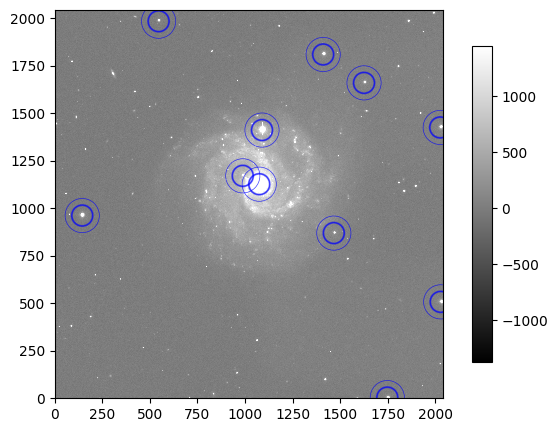

In [303]:
aperture = CircularAperture(positions, radius)
annulus = CircularAnnulus(positions, r_in, r_out)
#print(aperture)
#print(annulus)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
im1 = axes.imshow(Image, cmap='gray', origin='lower',\
                  vmin=np.median(Image)-3.0*np.std(Image),\
                  vmax=np.median(Image)+3.0*np.std(Image))
aperture.plot(color='blue', lw=1.5, alpha=0.5)
annulus.plot(color='blue', lw=.5, alpha=0.75)
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [284]:
print(sources)

 id     xcentroid      ...        flux                mag        
--- ------------------ ... ------------------ -------------------
  1 1748.6087281814305 ...   9.67878644064592 -2.4645522684851553
  2  706.7046546707372 ...  3.597423358095789 -1.3899788755204652
  3 1747.6643191207459 ...  9.602817136627399 -2.4559966470293686
  4 1749.8075431069335 ...  8.056575798086142 -2.2653762434776286
  5 1748.8754791362567 ...  8.090438297394206  -2.269930125101002
  6 1927.8621006338801 ...  1.336478486190326 -0.3149049303576016
  7 1418.6148546804757 ... 11.295671334163389  -2.632280118477049
  8 1418.9098832277546 ...  9.510497239262323 -2.4455080595944496
  9 1418.9813902417227 ... 11.582426282885365  -2.659498861970415
 10  955.7813336822833 ... 2.6273405395720335 -1.0487909174733685
...                ... ...                ...                 ...
 83  822.7087691900331 ...  9.943278344869942 -2.4938239922683576
 84 1933.6492399320389 ...   2.22844966268494 -0.8700070711900308
 85 273.36

## Find sources on the down-sampled image

In [88]:
radius = 4.
dr = 3.
r_in = radius
r_out = r_in + dr
aperture_area = np.pi*radius**2.
annulus_area = np.pi*r_out**2. - aperture_area

In [89]:
Mask = make_source_mask(ImageDownSample, nsigma=2, npixels=5, dilate_size=11)
Mean, Median, STD = sigma_clipped_stats(ImageDownSample, sigma=3.0, mask=Mask)
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(ImageDownSample, (32, 32), filter_size=(4, 4),\
                   sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)
find_stars = DAOStarFinder(fwhm=2, threshold=1300.5)
sources = find_stars((ImageDownSample-bkg.background) - Median)

#print(sources["flux"])
#print(max(sources["flux"]))
#print(max(sources["peak"]))
cent = max(sources["flux"])
pk = max(sources["peak"])

    #positions = ((sources['xcentroid'][0], sources['ycentroid'][0]),(sources['xcentroid'][1], sources['ycentroid'][1])) 
positions = ()
for i in np.arange(len(sources)):
    positions = positions + ((sources['xcentroid'][i], sources['ycentroid'][i]),)
    #if sources["flux"][i] == cent:
        #print("center:")
        #print(i,(sources['xcentroid'][i], sources['ycentroid'][i]))
    #if sources["peak"][i] == pk:
        #print("center:")
        #print(i,(sources['xcentroid'][i], sources['ycentroid'][i]))
    #print (sources)
    #print (positions)
    #print positions1
    
aperture = CircularAperture(positions, radius)
annulus = CircularAnnulus(positions, r_in, r_out)
flux = []
flux = aperture_photometry(ImageDownSample,aperture,method='subpixel', subpixels=32)
backg = aperture_photometry(ImageDownSample,annulus,method='subpixel', subpixels=32)

    #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75)) 
    #im1 = axes.imshow(SumImage_D1, cmap='gray', origin='lower',\
    #              vmin=np.median(SumImage_D1)-3.0*np.std(SumImage_D1),\
    #              vmax=np.median(SumImage_D1)+3.0*np.std(SumImage_D1))
    #aperture.plot(color='blue', lw=1.5, alpha=0.5)
    #annulus.plot(color='blue', lw=.5, alpha=0.75)
    #fig.subplots_adjust(right=0.8)
    #cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
    #fig.colorbar(im1, cax=cbar_ax1)
    #plt.show()
 
    #print type(flux.pprint(show_name=False, show_unit=False))
    #print flux[0]
    #print flux['xcenter'][0]
    
for i in np.arange(len(flux)):
    I = flux['id'][i]
    X = flux['xcenter'][i]
    Y = flux['ycenter'][i]   
    F = flux['aperture_sum'][i]-(backg['aperture_sum'][i]*aperture_area/annulus_area)
    RFE = 1.0/np.sqrt(F)
    P = sources['peak'][i]
    S = sources['sharpness'][i]
    R = sources['roundness2'][i]
    #print(I, X, Y, F, RFE, P, S, R, 'NGC 3184')
    

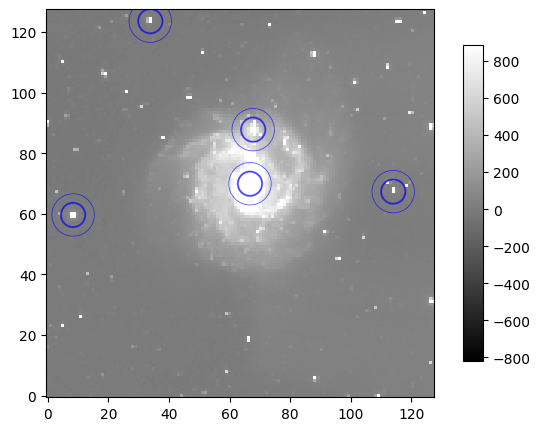

In [90]:
aperture = CircularAperture(positions, radius)
annulus = CircularAnnulus(positions, r_in, r_out)
#print(aperture)
#print(annulus)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
im1 = axes.imshow(ImageDownSample, cmap='gray', origin='lower',\
                  vmin=np.median(ImageDownSample)-3.0*np.std(ImageDownSample),\
                  vmax=np.median(ImageDownSample)+3.0*np.std(ImageDownSample))
aperture.plot(color='blue', lw=1.5, alpha=0.5)
annulus.plot(color='blue', lw=.5, alpha=0.75)
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [91]:
ImageDownSample[66:74,63:71]=backg['aperture_sum'][4]

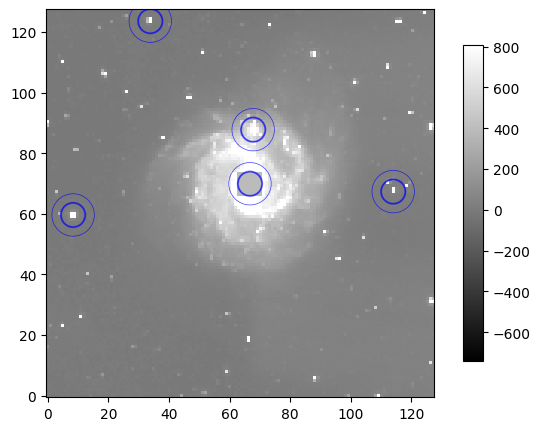

In [92]:
aperture = CircularAperture(positions, radius)
annulus = CircularAnnulus(positions, r_in, r_out)
#print(aperture)
#print(annulus)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
im1 = axes.imshow(ImageDownSample, cmap='gray', origin='lower',\
                  vmin=np.median(ImageDownSample)-3.0*np.std(ImageDownSample),\
                  vmax=np.median(ImageDownSample)+3.0*np.std(ImageDownSample))
aperture.plot(color='blue', lw=1.5, alpha=0.5)
annulus.plot(color='blue', lw=.5, alpha=0.75)
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [93]:
hdu = fits.PrimaryHDU(ImageDownSample)
hdu.writeto('DownSample_Bulge.fits')

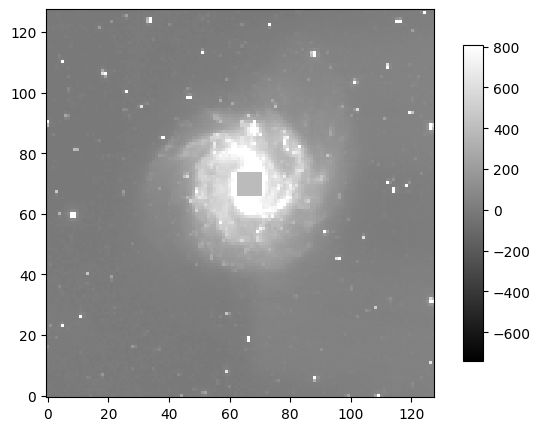

In [94]:
FitsName = 'DownSample_Bulge.fits'
hdulist = fits.open(FitsName)
hdulist.close()
#print (hdulist[0].header['FILENAME'])
#print (hdulist[0].header['DATE-OBS'])
ImageDownSample = fits.getdata(FitsName)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(ImageDownSample, cmap='gray', origin='lower',\
                  vmin=np.median(ImageDownSample)-3.0*np.std(ImageDownSample),\
                  vmax=np.median(ImageDownSample)+3.0*np.std(ImageDownSample))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()
#==================================================================================
#print(np.median(ImageDownSample))
#print(len(ImageDownSample))
#print((ImageDownSample.size))
#print(float(ImageDownSample.size/len(ImageDownSample)))
#print(type(Image))
#print((Image))
#print(Image[0,1])

## FFT and AC of the down-sampled Image

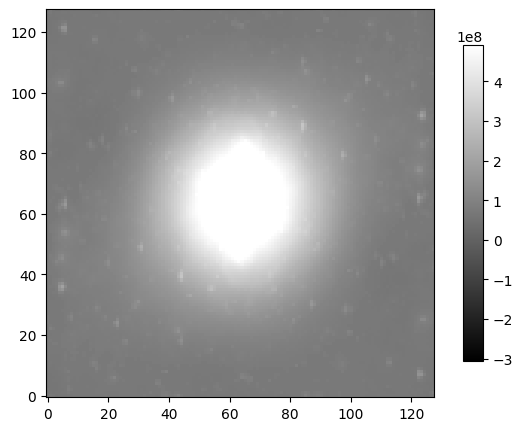

In [17]:
image_product = np.fft.fft2(ImageDownSample) * np.fft.fft2(ImageDownSample).conj()
cc_image = np.fft.fftshift(np.fft.ifft2(image_product))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
im1 = axes.imshow(cc_image.real, cmap='gray', origin='lower',\
                  vmin=np.median(cc_image.real)-3.0*np.std(cc_image.real),\
                  vmax=np.median(cc_image.real)+3.0*np.std(cc_image.real))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [18]:
from skimage.transform import warp_polar
warped = warp_polar(Image, (1126,1075), radius = 500, scaling='linear')
#warped = warp_polar(ImageDownSample, radius=40, output_shape=ImageDownSample.shape, scaling='linear')
warped_AC = warp_polar(cc_image.real, radius=64, scaling='log')
#https://scikit-image.org/docs/dev/auto_examples/registration/plot_register_rotation.html#sphx-glr-auto-examples-registration-plot-register-rotation-py

In [19]:
print(warped.shape)

(360, 500)


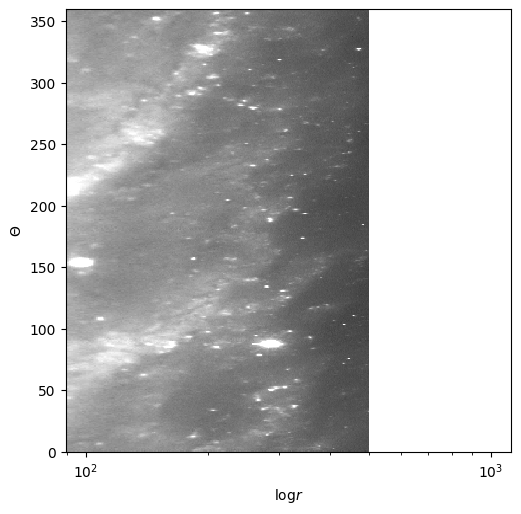

In [333]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
#tr = transforms.Affine2D().rotate_deg(90)
im1 = axes.imshow(warped, cmap='gray', origin='lower',\
                  vmin=np.median(tr)-1.0*np.std(tr),\
                  vmax=np.median(tr)+1.0*np.std(tr))
axes.set_ylabel(r'$\Theta$')
axes.set_xlabel(r'$\log r$')
axes.set_xscale('log')
#im1 = axes.imshow(tr, cmap='gray', origin='lower',\
#                  vmin=np.median(warped)-3.0*np.std(warped),\
#                  vmax=np.median(warped)+3.0*np.std(warped))
#im1 = axes.imshow(warped, cmap='gray', origin='lower')
#axes.set_xlim([80,500])
#fig.subplots_adjust(right=0.8)
#cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
##cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
#fig.colorbar(im1, cax=cbar_ax1)
plt.show()

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
#tr = transforms.Affine2D().rotate_deg(90)
tr = scipy.ndimage.rotate(warped, -90)
print(tr.shape)
im1 = axes.imshow(tr, cmap='gray', origin='lower',\
                  vmin=np.median(tr)-1.0*np.std(tr),\
                  vmax=np.median(tr)+1.0*np.std(tr))
axes.set_xlabel(r'$\Theta$')
axes.set_ylabel(r'$\log r$')
axes.set_yscale('log')
#im1 = axes.imshow(tr, cmap='gray', origin='lower',\
#                  vmin=np.median(warped)-3.0*np.std(warped),\
#                  vmax=np.median(warped)+3.0*np.std(warped))
#im1 = axes.imshow(warped, cmap='gray', origin='lower')
axes.set_ylim([150,1950])
#fig.subplots_adjust(right=0.8)
#cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
##cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
#fig.colorbar(im1, cax=cbar_ax1)
plt.show()

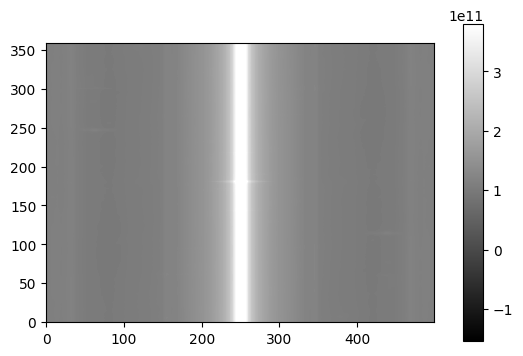

In [334]:
image_product = np.fft.fft2(warped) * np.fft.fft2(warped).conj()
ac_warped_image = np.fft.fftshift(np.fft.ifft2(image_product))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
im1 = axes.imshow(ac_warped_image.real, cmap='gray', origin='lower',\
                  vmin=np.median(ac_warped_image.real)-3.0*np.std(ac_warped_image.real),\
                  vmax=np.median(ac_warped_image.real)+3.0*np.std(ac_warped_image.real))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

## StatMorph

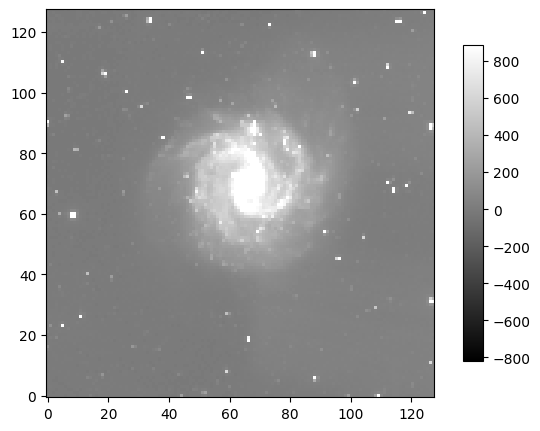

In [14]:
FitsName = 'DownSample.fits'
hdulist = fits.open(FitsName)
hdulist.close()
#print (hdulist[0].header['FILENAME'])
#print (hdulist[0].header['DATE-OBS'])
ImageDownSample = fits.getdata(FitsName)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(ImageDownSample, cmap='gray', origin='lower',\
                  vmin=np.median(ImageDownSample)-3.0*np.std(ImageDownSample),\
                  vmax=np.median(ImageDownSample)+3.0*np.std(ImageDownSample))
fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

#print(np.median(ImageDownSample))
#print(len(ImageDownSample))
#print((ImageDownSample.size))
#print(float(ImageDownSample.size/len(ImageDownSample)))
##print(type(Image))
#print((Image))
#print(Image[0,1])

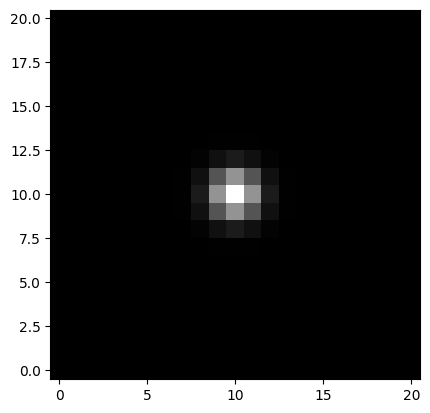

In [15]:
size = 10  # on each side from the center
sigma_psf = 0.95
y, x = np.mgrid[-size:size+1, -size:size+1]
psf = np.exp(-(x**2 + y**2)/(2.0*sigma_psf**2))
psf /= np.sum(psf)
plt.imshow(psf, origin='lower', cmap='gray')

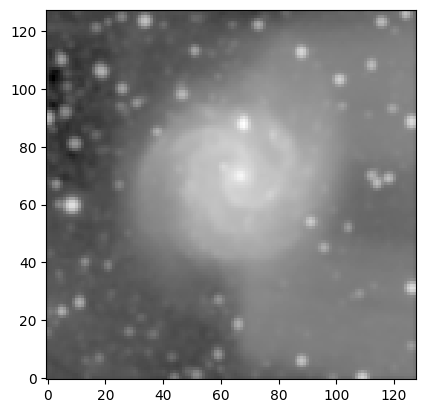

In [16]:
ImageDownSample = convolve(ImageDownSample, psf)
plt.imshow(ImageDownSample, cmap='gray', origin='lower',  norm=simple_norm(ImageDownSample, stretch='log', log_a=10000))

In [17]:
gain = 2.13

In [48]:
threshold = photutils.detect_threshold(ImageDownSample, 5.0)
print(threshold[1])
npixels = 150  # minimum number of connected pixels
segm = photutils.detect_sources(ImageDownSample, threshold, npixels)

[141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292323 141.87292323 141.87292323 141.87292323 141.87292323
 141.87292

In [49]:
print(threshold)
print(segm)

[[141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]
 [141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]
 [141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]
 ...
 [141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]
 [141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]
 [141.87292323 141.87292323 141.87292323 ... 141.87292323 141.87292323
  141.87292323]]
<photutils.segmentation.core.SegmentationImage>
shape: (128, 128)
nlabels: 1
labels: [1]


[2379]
1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


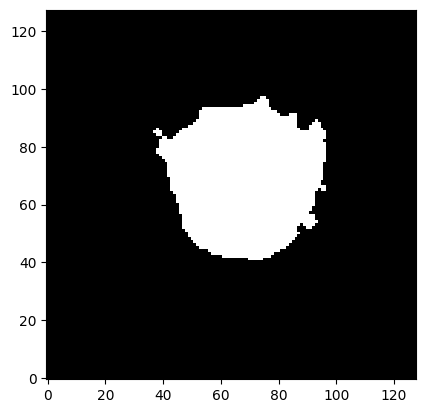

In [59]:
# Keep only the largest segment
print(segm.areas)
label = np.argmax(segm.areas) + 1
print(label)
print(segm.data[59])
segmap = segm.data == label
print(segmap)
plt.imshow(segmap, origin='lower', cmap='gray')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


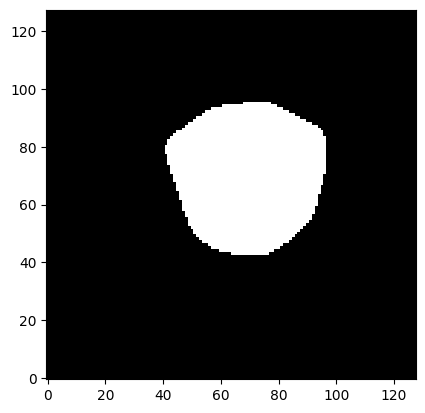

In [61]:
segmap_float = ndi.uniform_filter(np.float64(segmap), size=10)
print(segmap_float)
segmap = segmap_float > 0.5
print(segmap)
plt.imshow(segmap, origin='lower', cmap='gray')

In [52]:
start = time.time()
source_morphs = statmorph.source_morphology(ImageDownSample, segmap, gain=gain, psf=psf, skybox_size=25)
print('Time: %g s.' % (time.time() - start))

Time: 0.810536 s.


In [53]:
morph = source_morphs[0]

In [54]:
print('sn_per_pixel =', morph.sn_per_pixel)
print('sky_mean =', morph.sky_mean)
print('sky_median =', morph.sky_median)
print('sky_sigma =', morph.sky_sigma)
print('xc_centroid =', morph.xc_centroid)
print('yc_centroid =', morph.yc_centroid)
#print('ellipticity_centroid =', morph.ellipticity_centroid)
#print('elongation_centroid =', morph.elongation_centroid)
#print('orientation_centroid =', morph.orientation_centroid)
#print('xc_asymmetry =', morph.xc_asymmetry)
#print('yc_asymmetry =', morph.yc_asymmetry)
#print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
#print('elongation_asymmetry =', morph.elongation_asymmetry)
#print('orientation_asymmetry =', morph.orientation_asymmetry)
#print('rpetro_circ =', morph.rpetro_circ)
#print('rpetro_ellip =', morph.rpetro_ellip)
print('rmax_circ =', morph.rmax_circ)
print('rhalf_circ =', morph.rhalf_circ)
#print('rhalf_ellip =', morph.rhalf_ellip)
print('r20 =', morph.r20)
print('r80 =', morph.r80)
print('Gini =', morph.gini)
print('M20 =', morph.m20)
#print('F(G, M20) =', morph.gini_m20_bulge)
#print('S(G, M20) =', morph.gini_m20_merger)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)
print('sersic_amplitude =', morph.sersic_amplitude)
print('sersic_rhalf =', morph.sersic_rhalf)
print('sersic_n =', morph.sersic_n)
print('sersic_xc =', morph.sersic_xc)
print('sersic_yc =', morph.sersic_yc)
#print('sersic_ellip =', morph.sersic_ellip)
#print('sersic_theta =', morph.sersic_theta)
print('flag =', morph.flag)
print('flag_sersic =', morph.flag_sersic)
print('slice box =',morph._slice_skybox)

sn_per_pixel = 11.497855944354063
sky_mean = 8.143385486077229
sky_median = 4.054801389237889
sky_sigma = 20.85154123371413
xc_centroid = 67.69471437587902
yc_centroid = 70.56928422007844
rmax_circ = 92.40755085877875
rhalf_circ = 19.415276063446633
r20 = 9.096227634224714
r80 = 28.878171045974927
Gini = 0.48369685813549135
M20 = -1.3115971396905526
C = 2.5085418215721593
A = 0.35700774246517614
S = 0.06682076252865556
sersic_amplitude = 282.83856955446714
sersic_rhalf = 21.074681855668675
sersic_n = 1.2224182141606088
sersic_xc = 66.77416565006175
sersic_yc = 70.2112457994476
flag = 1
flag_sersic = 0
slice box = (slice(0, 25, None), slice(0, 25, None))


### Moments

In [234]:
x0 = 67
y0 = 71

print(len(cc_image.real[0]))
mx2 = 0.0
my2 = 0.0
mxy = 0.0
for i in np.arange(len(cc_image.real)):
    for j in np.arange(len(cc_image.real[i])):
        #print(i,j,Image[i,j])
        if (j == 67) and (i == 71):
            _mx2 = 0.0
            _my2 = 0.0
            _mxy = 0.0
        else:
            _mx2 = cc_image.real[i,j]*(j-x0)**2/((j-x0)**2+(i-y0)**2)
            _my2 = cc_image.real[i,j]*(i-y0)**2/((j-x0)**2+(i-y0)**2)
            _mxy = cc_image.real[i,j]*(j-x0)*(i-y0)/((j-x0)**2+(i-y0)**2)
        mx2 += _mx2
        my2 += _my2
        mxy += _mxy
        #print(mx2, my2, mxy)
print(mx2,my2,mxy,2.0*mxy/(mx2-my2),np.arctan2(2.0*mxy, (mx2-my2)) * 180 / np.pi)

128
1217117779578.022 1292383331491.4863 61252455502.52461 -1.6276358558547175 121.56606817478759


In [235]:
meanIm = np.mean(ImageDownSample)
print(meanIm)

96.24082889253165


### Inclination

In [236]:
Phi = 0.5 * np.arctan2(2.0*mxy, (mx2-my2)) * 180 / np.pi
I = (np.cos(2.0 * Phi) * (mx2 + my2) + (mx2 - my2))/(np.cos(2.0 * Phi) * (mx2 + my2) - (mx2 - my2))
print(I)

1.1097083833490167


### Autocorrelation

In [242]:
from scipy import signal
Image_off_mean = ImageDownSample - ImageDownSample.mean()
corr = signal.correlate2d(ImageDownSample, ImageDownSample, boundary='symm', mode='same')
#corr = signal.correlate2d(Image_off_mean, Image_off_mean, boundary='symm', mode='same')



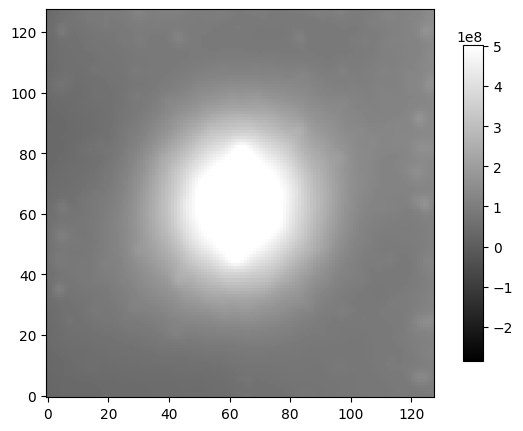

In [243]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(corr, cmap='gray', origin='lower',\
                  vmin=np.median(corr)-3.0*np.std(corr),\
                  vmax=np.median(corr)+3.0*np.std(corr))

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [244]:
x0 = 67
y0 = 71

print(len(corr[0]))
mx2 = 0.0
my2 = 0.0
mxy = 0.0
for i in np.arange(len(AC)):
    for j in np.arange(len(AC[i])):
        #print(i,j,Image[i,j])
        if (j == 67) and (i == 71):
            _mx2 = 0.0
            _my2 = 0.0
            _mxy = 0.0
        else:
            _mx2 = AC[i,j]*(j-x0)**2/((j-x0)**2+(i-y0)**2)
            _my2 = AC[i,j]*(i-y0)**2/((j-x0)**2+(i-y0)**2)
            _mxy = AC[i,j]*(j-x0)*(i-y0)/((j-x0)**2+(i-y0)**2)
        mx2 += _mx2
        my2 += _my2
        mxy += _mxy
        #print(mx2, my2, mxy)
print(mx2,my2,mxy,2.0*mxy/(mx2-my2),np.arctan2(2.0*mxy, (mx2-my2)) * 180 / np.pi)

128
24793707372.356796 12138392649.13694 12396236.278283317 0.0019590561830183195 0.11224550752038528


In [245]:
Phi = 0.5 * np.arctan2(2.0*mxy, (mx2-my2)) * 180 / np.pi
I = (np.cos(2.0 * Phi) * (mx2 + my2) + (mx2 - my2))/(np.cos(2.0 * Phi) * (mx2 + my2) - (mx2 - my2))
print(I)

2.0526632427594995


In [ ]:
#_AC = np.zeros((900,748))
#AC = np.zeros((900,748))
_AC_frei = np.zeros((128,128))
AC_frei = np.zeros((128,128))
for k in np.arange(len(_AC_frei)):
    for l in np.arange(len(_AC_frei[i])):
        #print(i,j,Image[i,j])
        N = 0
        for i in np.arange(len(ImageDownSample)-k):
            for j in np.arange(len(ImageDownSample[i])-l):
                _AC_frei[k,l] += (ImageDownSample[i,j]-meanIm)*(ImageDownSample[i+k,j+l]-meanIm)
                N += 1
        AC_frei[k,l] = _AC_frei[k,l]/N
        print(k,l,N,AC_frei[k,l])
print(N,AC_frei)


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75))
##im1 = apertures_D1.plot(color='blue', lw=1.5, alpha=0.5)
im1 = axes.imshow(AC_frei, cmap='gray', origin='lower',\
                  vmin=np.median(AC_frei)-3.0*np.std(AC_frei),\
                  vmax=np.median(AC_frei)+3.0*np.std(AC_frei))

fig.subplots_adjust(right=0.8)
cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
#cbar_ax2 = fig.add_axes([0.85, 0.12, 0.05, 0.32])
fig.colorbar(im1, cax=cbar_ax1)
plt.show()

In [ ]:
_AC = np.zeros((900,748))
print(Image.shape)
print(_AC.shape)

### Silhouette

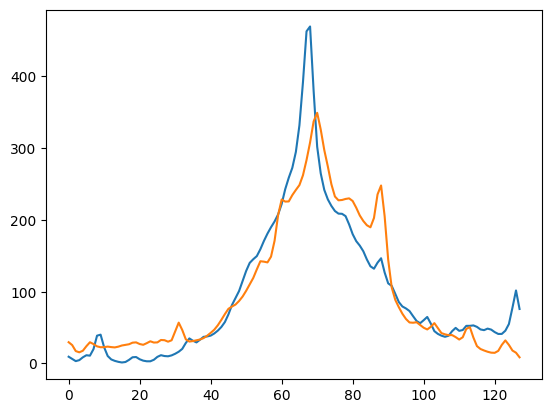

In [246]:
#print(len(Image[:,0]))
#print(np.arange(len(Image[:,0])))
#-----------------------------------

# vertical silhouette
vs = np.zeros(len(ImageDownSample[0,:]))
for i in np.arange(len(ImageDownSample[0,:])):
    #print(i,np.mean(Image[:,i]))
    vs[i] = np.mean(ImageDownSample[:,i])
# horizontal silhouette
hs = np.zeros(len(ImageDownSample[:,0]))
for j in np.arange(len(ImageDownSample[:,0])):
    #print(j,np.mean(Image[j,:]))
    hs[j] = np.mean(ImageDownSample[j,:])
plt.plot(np.arange(len(vs)),vs)
plt.plot(np.arange(len(hs)),hs)

### Radial brightness profile

In [247]:
r = np.logspace(1,2.5,num=100)
RP = np.zeros(100)
print(r)

[ 10.          10.35503366  10.72267222  11.10336318  11.49756995
  11.90577239  12.32846739  12.76616949  13.21941148  13.6887451
  14.17474163  14.67799268  15.19911083  15.73873043  16.29750835
  16.87612476  17.475284    18.09571541  18.73817423  19.4034425
  20.09233003  20.80567538  21.5443469   22.30924374  23.101297
  23.92147081  24.77076356  25.65020906  26.56087783  27.50387841
  28.48035868  29.4915073   30.53855509  31.6227766   32.74549163
  33.90806682  35.11191734  36.35850861  37.64935807  38.98603703
  40.37017259  41.80344962  43.28761281  44.82446879  46.41588834
  48.06380863  49.77023564  51.53724656  53.36699231  55.2617002
  57.22367659  59.25530976  61.35907273  63.53752638  65.79332247
  68.12920691  70.54802311  73.05271543  75.64633276  78.33203223
  81.11308308  83.99287059  86.97490026  90.06280202  93.26033469
  96.57139053 100.         103.55033665 107.2267222  111.03363182
 114.97569954 119.05772394 123.28467394 127.66169491 132.19411485
 136.88745095 1

10.0 1256.6370614359173 4693.902839645723
10.355033664891309 90.81366950518972 66896.98124153478
10.722672220103231 97.3765211208929 64237.45797789055
11.103363181676379 104.41365179132991 61644.334950665245
11.497569953977356 111.95933634624215 59147.00629561389
11.905772393787833 120.0503265621045 56709.34420897673
12.32846739442066 128.72603016418014 54340.95139522512
12.766169490574075 138.0287027645622 52054.7363318028
13.219411484660288 148.00365367104632 49814.77267705384
13.688745095370805 158.6994665692298 47656.79308789725
14.174741629268055 170.1682361527118 45512.13896204009
14.677992676220699 182.46582185386225 43463.964489387086
15.199110829529339 195.65211991107026 41495.75087785757
15.738730431619036 209.79135509747468 39627.869054341274
16.297508346206442 224.95239353215047 37842.42210682007
16.876124757881477 241.20907809729184 36141.1615606148
17.47528400007684 258.64058809505525 34512.63321232556
18.09571541243321 277.3318248958 32921.46825809083
18.73817422860384 2

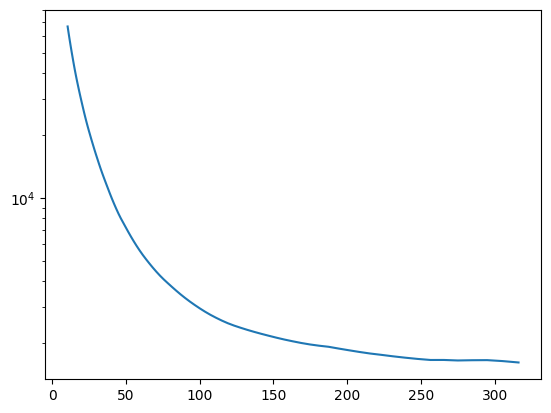

In [248]:
r_ = 0.0
for i in np.arange(len(r)):
    #r = ((2.0*i**2 - (r_)**2) ** 0.5)
    #print(r[i])
    aperture = CircularAperture((1089,1410), r[i])
#annulus = CircularAnnulus(positions, r_in, r_out)
    flux = []
    flux = aperture_photometry(Image,aperture,method='subpixel', subpixels=32)
#backg = aperture_photometry(Image,annulus,method='subpixel', subpixels=32)

    #fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.75, 5.75)) 
    #im1 = axes.imshow(SumImage_D1, cmap='gray', origin='lower',\
    #              vmin=np.median(SumImage_D1)-3.0*np.std(SumImage_D1),\
    #              vmax=np.median(SumImage_D1)+3.0*np.std(SumImage_D1))
    #aperture.plot(color='blue', lw=1.5, alpha=0.5)
    #annulus.plot(color='blue', lw=.5, alpha=0.75)
    #fig.subplots_adjust(right=0.8)
    #cbar_ax1 = fig.add_axes([0.85, 0.22, 0.035, 0.55])
    #fig.colorbar(im1, cax=cbar_ax1)
    #plt.show()
 
    #print type(flux.pprint(show_name=False, show_unit=False))
    #print flux[0]
    #print flux['xcenter'][0]
    
#for i in np.arange(len(flux)):
#    I = flux['id'][i]
#    X = flux['xcenter'][i]
#    Y = flux['ycenter'][i]   
#    F = flux['aperture_sum'][i]-(backg['aperture_sum'][i]*aperture_area/annulus_area)
#    RFE = 1.0/np.sqrt(F)
#    P = sources['peak'][i]
#    S = sources['sharpness'][i]
#    R = sources['roundness2'][i]
#    print(I, X, Y, F, RFE, P, S, R, 'NGC 3184')
#F = flux['aperture_sum'][i]
    #print(r_)
    area = 4.0*np.pi*(r[i]**2-r_**2)
    #print(flux['aperture_sum'][0]/area)
    print(r[i],area,flux['aperture_sum'][0]/area)
    RP[i] = flux['aperture_sum'][0]/area
    r_ = r[i]
#print(flux)
#plt.plot(r[25:],RP[25:])
plt.plot(r[1:],RP[1:])
plt.yscale('log')

In [249]:
from scipy.optimize import curve_fit
def func_b(x,a,b):
    return(a*np.exp(-7.67*((x/b)**0.25-1.0)))
def func_d(x,c,d,e):
    return(c*np.exp(-1.0*x/d)+e)

In [250]:
popt_b, pcov_b = curve_fit(func_b, r[1:25], RP[1:25])
print(popt_b)
popt_d, pcov_d = curve_fit(func_d, r[30:100], RP[30:100])
print(popt_d)

[3620.0743856    70.33312935]
[1.00000000e+00 1.00000000e+00 5.04952104e+03]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


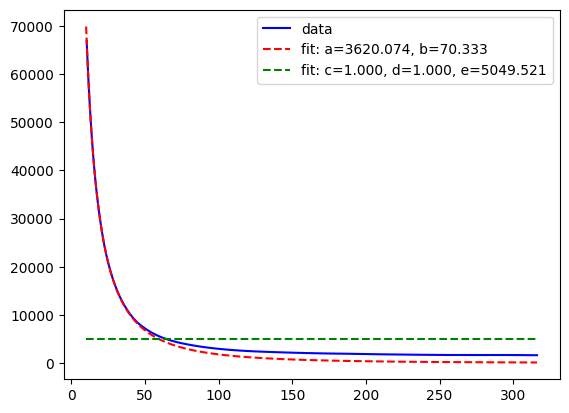

In [251]:
plt.plot(r[1:], RP[1:], 'b-', label='data')
#plt.yscale('log')
plt.plot(r, func_b(r, *popt_b), 'r--', label='fit: a=%5.3f, b=%5.3f' % tuple(popt_b))
plt.plot(r, func_d(r, *popt_d), 'g--', label='fit: c=%5.3f, d=%5.3f, e=%5.3f' % tuple(popt_d))
plt.legend()

### Collapsed brightness

In [ ]:
x0 = 1089
y0 = 1410
r = 0.0
Phi = 0.0
f_dat = open("theta_r.dat", "w+")
print(len(Image[0]))
for i in np.arange(len(Image)):
    for j in np.arange(len(Image[i])):
        #print(i,j,Image[i,j])
        if (j == 1089) and (i == 1410):
            r = 1.0e-16
            Phi = 1.0e-16
        else:
            r = ((j-x0)**2+(i-y0)**2)**0.5
            Phi = np.arctan2(i-y0,j-x0)  * 180 / np.pi
            f = Image[i,j]
        #print(i,j,r,Phi,f)
        f_dat.write('{0:2f} {1:2f} {2:2f} {3:2f} {4:2f}\n'.format(i,j,r,Phi,f))
        f_dat.flush()
#print(mx2,my2,mxy,2.0*mxy/(mx2-my2),np.arctan2(2.0*mxy, (mx2-my2)) * 180 / np.pi)

In [ ]:
Load = np.loadtxt("theta_r.dat")
radius = np.log(Load[:,2])
Azimuth_angle = Load[:,3]
pixel_value = Load[:,4]

#T = np.clip(pixel_value.reshape((900,748)),2.0,8.)

In [ ]:
print(radius.shape)
print(min(radius))

In [ ]:
T = pixel_value.reshape((2043,2042))
T = np.clip(pixel_value.reshape((2042,2043)),-0.2,0.2)
print(T.shape)
print(T[0,:])

In [ ]:
print(np.amin(T),np.amax(T))

In [ ]:
extent = [Azimuth_angle.min(), Azimuth_angle.max(), radius.min(), radius.max()]
fig, ax1 = plt.subplots(1,figsize=(10,6)) #CHANGE THE NR. of PANELS!!!!!!!
ax1.tick_params(axis='both',which='major',labelsize=24)
ax1.set_xlim(extent[0],extent[1])
ax1.set_ylim(extent[2],extent[3])
    #ax.set_yticks(np.array([0,25,50,75,100]))
    #labels = [item.get_text() for item in ax.set_yticklabels(np.logspace(-2,2,num=5))]
    #ax.set_yticklabels([str(round(float(label), 3)) for label in labels])
ax1.set_ylabel("radius",fontsize=26,fontweight='bold')
    #ax.set_xlabel("$a_{\mathrm{Saturn}}$ [AU]",fontsize=22,fontweight='bold')
ax1.set_xlabel("Theta",fontsize=26,fontweight='bold')


im = ax1.imshow(T, vmin=np.amin(T), vmax=np.amax(T), aspect='auto', origin="lower", interpolation='nearest', cmap="gist_yarg", extent=extent)
cb = plt.colorbar(im, ax=ax1)
cb.solids.set_rasterized(True)
cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=18)
cb.set_label("Intensity", fontsize=20)